<a href="https://colab.research.google.com/github/Adityaarya2003/Adityaarya2003/blob/main/Spam_SMS_Detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [68]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [69]:
df = pd.read_csv("/content/drive/MyDrive/spam.csv",encoding='latin-1')

In [70]:
df = df.rename(columns={'v1':'label','v2':'text'})

In [71]:
df['text'] = df['text'].apply(lambda x: x.replace('\r\n',' '))

In [72]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)

In [73]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [75]:
#Tokenization and Stemming:
stemmer = PorterStemmer()
corpus=[]

stopwords_set = set(stopwords.words('english'))

for i in range(len(df)):
    text = df['text'].iloc[i].lower()
    text = text.translate(str.maketrans('','',string.punctuation)).split()
    text = [stemmer.stem(word) for word in text if word not in stopwords_set]
    text =' '.join(text)
    corpus.append(text)

In [76]:
#After preprocessing:
corpus[2]

'free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18'

In [77]:
#Feature Extraction:

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(corpus)
y = df.label

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [78]:
# Hyperparameter Tuning using Grid Search with Cross-Validation
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f'Best k value: {best_k}')

Best k value: 1


In [85]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [80]:
#Evaluation:
knn.score(x_test,y_test)

0.9408071748878923

In [81]:
LB = LabelEncoder()
y_test = LB.fit_transform(y_test)
y_pred = LB.fit_transform(y_pred)

In [82]:
def eval_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1-score: {f1:.4f}')
eval_metrics(y_test, y_pred)

Accuracy: 0.9408
Precision: 1.0000
Recall: 0.5901
F1-score: 0.7422


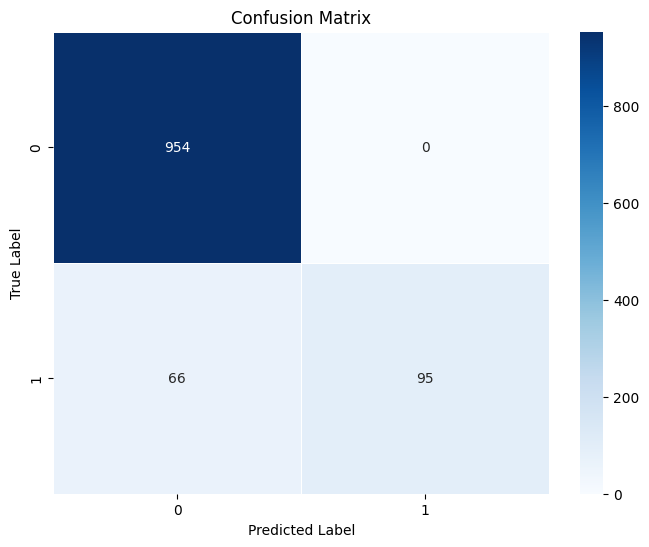

In [83]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()